# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy.visualization import simple_norm
from astropy.wcs import WCS
import numpy as np
from astropy.stats import sigma_clip
from astropy.io import fits

from scipy import signal
import pickle as pkl

# Single data

In [2]:
df = pd.read_csv('./data/604826.csv', comment='#')
df

ALPHA_J2000  DELTA_J2000    FLUX_AUTO  FLUX_RELERR_AUTO  CLASS_STAR  \
0        215.231831    52.898138  1490.617920          0.019974       0.743   
1        214.894545    53.097003    94.664742          0.248657       0.489   
2        215.091284    52.979154    61.705227          0.310547       0.379   
3        215.207562    52.909093   900.460815          0.034485       0.840   
4        215.490903    53.493301    42.644035          0.594238       0.470   
...             ...          ...          ...               ...         ...   
604565   214.515393    52.745339    79.415420          0.074951       0.521   
604566   214.812878    52.561756    52.774242          0.072021       0.269   
604567   214.689575    52.637103    14.581264          0.144287       0.509   
604568   214.757007    52.595075     9.663751          0.207642       0.525   
604569   214.250261    52.317629    19.758976          0.136597       0.564   

        TILE_ID  FILTER_ID  
0          2351          1  
1          2351          1  
2          2351          1  
3          2351          1  
4          2351          1  
...         ...        ...  
604565     2242         60  
604566     2242         60  
604567     2242         60  
604568     2242         60  
604569     2242         60  

[604570 rows x 7 columns]

In [3]:
df.value_counts('FILTER_ID')

FILTER_ID
59    24614
60    21503
30    20959
31    20626
35    16658
28    15455
36    15409
50    14996
32    14908
29    14224
38    13869
39    13710
34    11974
17    11943
10    11454
24    11060
43    10928
58    10830
51    10631
33    10590
46    10587
25    10530
56    10369
41    10003
47     9962
45     9681
22     9555
44     9283
19     9091
14     9063
27     9009
21     8990
42     8882
49     8872
40     8801
37     8734
15     8677
18     8596
48     8595
55     8555
26     8325
3      8267
11     8162
52     7975
54     7874
7      7429
8      7136
53     6934
12     6709
23     6606
20     6483
4      5860
13     5703
16     5512
1      5015
2      4507
9      4351
5      4135
6      3896
57     1515
Name: count, dtype: int64

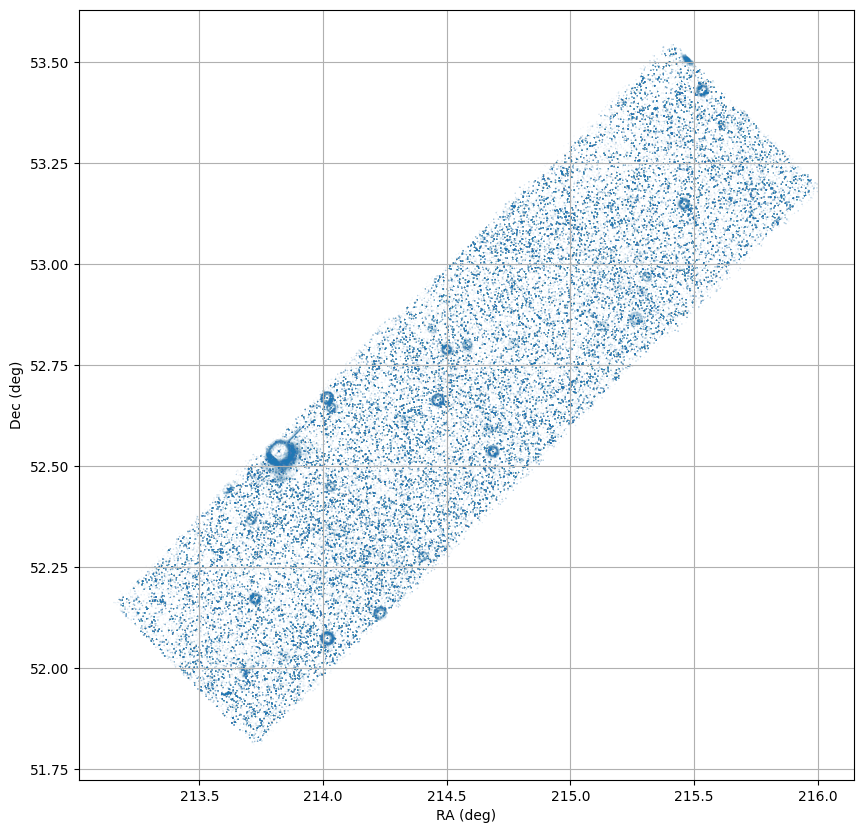

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df['ALPHA_J2000'], y=df['DELTA_J2000'], s=1, 
            alpha=0.05, edgecolors='none')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.grid()
plt.show()

# Dula data

In [5]:
df_dual = pd.read_csv('./data/FLambdaDualObj.csv', comment='#')
df_dual

TILE_ID  NUMBER  ALPHA_J2000  DELTA_J2000    hpix11     X_IMAGE  \
0         2406       2   214.881557    53.103476  11700101  1756.88098   
1         2406       4   214.861588    53.115839  11700103  1483.69287   
2         2406       9   215.061658    52.998000  11699994  4155.54639   
3         2406      10   215.180854    52.927186  11699984  5755.89111   
4         2406      11   214.907509    53.089148  11700101  2092.67017   
...        ...     ...          ...          ...       ...         ...   
64288     2243   15940   215.064895    52.812546  11699797  6312.52832   
64289     2243   15941   214.688544    53.040802  11699934  1201.92981   
64290     2243   15942   215.186475    52.737363  11699447  7982.65723   
64291     2243   15943   215.084326    52.799349  11699797  6592.61572   
64292     2243   15944   215.068525    52.809148  11699797  6375.31055   

           Y_IMAGE     R_EFF  FWHM_WORLD   A_WORLD  ...  \
0        16.847881  4.717021    0.000920  0.000203  ...   
1        23.799297  2.087801    0.000216  0.000089  ...   
2        27.424644  2.750906    0.000281  0.000112  ...   
3        28.008156  3.174753    0.000259  0.000118  ...   
4        27.677053  6.961071    0.000425  0.000076  ...   
...            ...       ...         ...       ...  ...   
64288  5494.858400  5.580144    0.000434  0.000208  ...   
64289  5523.615230  5.165153    0.000383  0.000080  ...   
64290  5477.959470  2.420266    0.000250  0.000088  ...   
64291  5478.614750  2.749503    0.000376  0.000099  ...   
64292  5481.346680  2.557108    0.000504  0.000099  ...   

                                                   FLAGS  \
0      17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 1...   
1      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
2      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
3      16 16 16 17 17 17 17 17 16 16 17 17 17 17 17 1...   
4      18 18 18 19 19 19 19 18 18 18 19 19 19 19 18 1...   
...                                                  ...   
64288  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.398938924 0.671059191 0.671870828 0.0 0.0 0....   
1      0.20837152 0.89839673 0.681177855 0.0 0.0 0.41...   
2      0.217361659 0.913546681 0.701026499 0.0 0.0 0....   
3      0.426156312 0.916839361 0.186319813 0.0 0.0 0....   
4      0.399055988 0.655363321 0.687582672 0.0 0.0 0....   
...                                                  ...   
64288  0.956941068 0.973625004 0.976183474 0.98467809...   
64289  0.947082579 0.965922475 0.944739759 0.96594297...   
64290  0.923828781 0.937540472 0.942529678 0.95318043...   
64291  0.967528522 0.97575736 0.973541498 0.978428304...   
64292  0.960996389 0.972236931 0.977609754 0.99181813...   

                                              MASK_FLAGS  \
0      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
1      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
3      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
4      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
...                                                  ...   
64288  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      0 0 0 0 0 0 0 0 0 9 0 0 0 0 9 0 11 0 0 0 0 8 8...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3     

In [6]:
df_dual.columns

Index(['TILE_ID', 'NUMBER', 'ALPHA_J2000', 'DELTA_J2000', 'hpix11', 'X_IMAGE',
       'Y_IMAGE', 'R_EFF', 'FWHM_WORLD', 'A_WORLD', 'B_WORLD', 'THETA_J2000',
       'ISOAREA_WORLD', 'RELERRA_WORLD', 'RELERRB_WORLD', 'ERRTHETA_J2000',
       'CLASS_STAR', 'FLUX_AUTO', 'FLUX_ISO', 'FLUX_PETRO', 'FLUX_MAX_ARCSEC2',
       'PETRO_RADIUS', 'KRON_RADIUS', 'FLUX_APER_0_8', 'FLUX_APER_1_0',
       'FLUX_APER_1_2', 'FLUX_APER_1_5', 'FLUX_APER_2_0', 'FLUX_APER_3_0',
       'FLUX_APER_4_0', 'FLUX_APER_6_0', 'FLUX_RELERR_AUTO', 'FLUX_RELERR_ISO',
       'FLUX_RELERR_PETRO', 'FLUX_RELERR_APER_0_8', 'FLUX_RELERR_APER_1_0',
       'FLUX_RELERR_APER_1_2', 'FLUX_RELERR_APER_1_5', 'FLUX_RELERR_APER_2_0',
       'FLUX_RELERR_APER_3_0', 'FLUX_RELERR_APER_4_0', 'FLUX_RELERR_APER_6_0',
       'FLAGS', 'NORM_WMAP_VAL', 'MASK_FLAGS', 'SINGLE_DETECT',
       'FLUX_ISO_WORSTPSF', 'FLUX_RELERR_ISO_WORSTPSF', 'FLUX_PSFCOR',
       'FLUX_RELERR_PSFCOR', 'FLUX_APER3_WORSTPSF',
       'FLUX_RELERR_APER3_WORSTPSF'],
 

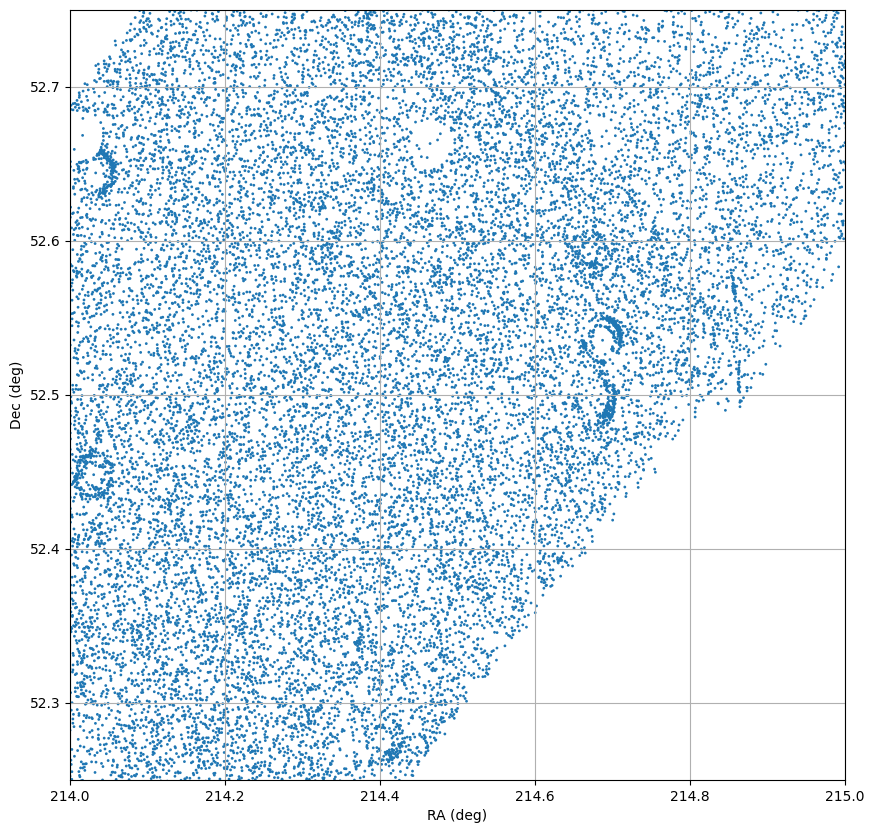

64293

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            alpha=1, edgecolors='none')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(214, 215)
plt.ylim(52.25, 52.75)
plt.grid()
plt.show()
len(df_dual)

# SDSS data

In [8]:
df_dual = pd.read_csv('./data/604827.csv', comment='#')
df_dual

ALPHA_J2000  DELTA_J2000  \
0       214.881557    53.103476   
1       214.861588    53.115839   
2       215.061658    52.998000   
3       215.180854    52.927186   
4       214.907509    53.089148   
...            ...          ...   
64288   215.064895    52.812546   
64289   214.688544    53.040802   
64290   215.186475    52.737363   
64291   215.084326    52.799349   
64292   215.068525    52.809148   

                                               FLUX_AUTO  \
0      182.865799 48.724514 88.6793365 0.0 0.0 -6.065...   
1      -1.43247414 -5.36248398 -13.7104988 -3.3015868...   
2      60.7909508 -10.184761 11.6957092 2.27859354 2....   
3      -2.15251517 0.169828132 -14.6118746 3.21706223...   
4      18.92099 4.24113035 16.713026 7.06329823 10.50...   
...                                                  ...   
64288  10.4889164 -10.5139389 22.524107 42.2049637 37...   
64289  -15.3364697 43.9341125 0.500564694 9.28878117 ...   
64290  32.1980095 23.9194908 24.1457367 75.9638672 73...   
64291  34.7161293 34.0826416 10.7551117 18.9449844 47...   
64292  13.473361 17.2105522 19.2490139 24.3374424 40....   

                                        FLUX_RELERR_AUTO  CLASS_STAR  TILE_ID  
0      0.358887 1.130859 0.291016 0.0 0.0 -3.511719 0...       0.676     2406  
1      -10.078125 -1.453125 -0.279297 -0.666504 0.0 1...       0.516     2406  
2      0.522461 -0.840332 0.762207 0.0 0.0 1.136719 0...       0.685     2406  
3      -5.394531 112.625 -0.611816 0.0 0.0 1.46582 0....       0.573     2406  
4      3.087891 10.367188 1.134766 3.466797 0.0 0.645...       0.750     2406  
...                                                  ...         ...      ...  
64288  3.138672 -1.167969 0.703125 0.546387 0.820312 ...       0.160     2243  
64289  -0.79248 0.48584 25.78125 1.992188 -1.319336 -...       0.358     2243  
64290  0.785645 0.862305 0.494141 0.230591 0.31665 0....       0.938     2243  
64291  0.599609 0.513184 0.945801 0.785645 0.413818 0...       0.441     2243  
64292  1.398438 0.911621 0.467041 0.545898 0.437744 0...       0.462     2243  

[64293 rows x 6 columns]

In [9]:
ra_c = (df_dual['ALPHA_J2000'].max() + df_dual['ALPHA_J2000'].min()) / 2
dec_c = (df_dual['DELTA_J2000'].max() + df_dual['DELTA_J2000'].min()) / 2
ra_c, dec_c

(np.float64(214.575034115), np.float64(52.67628441135))

In [10]:
ra_delta = df_dual['ALPHA_J2000'].max() - df_dual['ALPHA_J2000'].min()
dec_delta = df_dual['DELTA_J2000'].max() - df_dual['DELTA_J2000'].min()
ra_delta, dec_delta

(np.float64(2.827816296000009), np.float64(1.7266420528999973))

In [11]:
rad = 3 * u.arcmin
rad

<Quantity 3. arcmin>

In [12]:
coords = SkyCoord(ra=df_dual['ALPHA_J2000'], dec=df_dual['DELTA_J2000'], unit=(u.deg, u.deg), frame='icrs')
coords, len(coords)

(<SkyCoord (ICRS): (ra, dec) in deg
     [(214.88155692, 53.10347622), (214.86158834, 53.11583931),
      (215.06165824, 52.99799953), ..., (215.18647509, 52.73736272),
      (215.08432624, 52.79934893), (215.06852464, 52.80914842)]>,
 64293)

In [13]:
center = SkyCoord(ra=ra_c, dec=dec_c, unit=(u.deg, u.deg), frame='icrs')
xid = SDSS.query_region(center, radius=rad)
xid

<Table length=266>
       ra              dec               objid         run  rerun camcol field
    float64          float64             uint64       int64 int64 int64  int64
---------------- ---------------- ------------------- ----- ----- ------ -----
214.502951831203 52.6686038247542 1237661385994732006  3705   301      1   111
214.493511183676 52.6724849284308 1237661385994731996  3705   301      1   111
214.527681669406 52.6442452757406 1237661385994731577  3705   301      1   111
214.525982484492 52.6445006066207 1237661416065663439  3712   301      1   205
214.525982484492 52.6445006066207 1237661416065663440  3712   301      1   205
214.526125208059 52.6444875657194 1237661385994731575  3705   301      1   111
 214.51531126067 52.6522476690934 1237661385994732253  3705   301      1   111
214.519435957081 52.6509344845996 1237661385994732256  3705   301      1   111
214.518112483302 52.6416751488623 1237661385994731574  3705   301      1   111
             ...              ...                 ...   ...   ...    ...   ...
214.620316892585 52.7180026470424 1237661385994732290  3705   301      1   111
214.622730945188 52.7150681205848 1237661385994732475  3705   301      1   111
214.577233566093 52.7160248899293 1237661385994732031  3705   301      1   111
214.564289595996 52.7137220127019 1237661385994732027  3705   301      1   111
214.572511689239  52.715200768955 1237661385994732458  3705   301      1   111
 214.55985916205 52.7225698586912 1237661385994731829  3705   301      1   111
 214.57605926435 52.7252703851718 1237661385994731685  3705   301      1   111
214.576052797583 52.7252723779189 1237661385994731684  3705   301      1   111
214.578160263384 52.7227990852712 1237661385994732459  3705   301      1   111
 214.56614901299 52.7225293148845 1237661385994731831  3705   301      1   111

In [14]:
df_sdss = xid.to_pandas()
df_sdss

ra        dec                objid   run  rerun  camcol  field
0    214.502952  52.668604  1237661385994732006  3705    301       1    111
1    214.493511  52.672485  1237661385994731996  3705    301       1    111
2    214.527682  52.644245  1237661385994731577  3705    301       1    111
3    214.525982  52.644501  1237661416065663439  3712    301       1    205
4    214.525982  52.644501  1237661416065663440  3712    301       1    205
..          ...        ...                  ...   ...    ...     ...    ...
261  214.559859  52.722570  1237661385994731829  3705    301       1    111
262  214.576059  52.725270  1237661385994731685  3705    301       1    111
263  214.576053  52.725272  1237661385994731684  3705    301       1    111
264  214.578160  52.722799  1237661385994732459  3705    301       1    111
265  214.566149  52.722529  1237661385994731831  3705    301       1    111

[266 rows x 7 columns]

In [15]:
df_runs = df_sdss.value_counts(['run', 'camcol', 'field'])
df_runs

run   camcol  field
3705  1       111      251
3712  1       205       15
Name: count, dtype: int64

In [16]:
run, camcol, field = df_runs.index[0]
imgs = SDSS.get_images(run=run, camcol=camcol, field=field)

In [17]:
w = WCS(imgs[0][0].header)
w

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : np.float64(214.61319279) np.float64(52.7280517703) 
CRPIX : np.float64(1025.0) np.float64(745.0) 
CD1_1 CD1_2  : np.float64(4.58331020418e-05) np.float64(9.998384818e-05) 
CD2_1 CD2_2  : np.float64(9.99538649688e-05) np.float64(-4.58470133214e-05) 
NAXIS : 2048  1489

In [18]:
data = imgs[0][0].data

NameError: name 'mi' is not defined

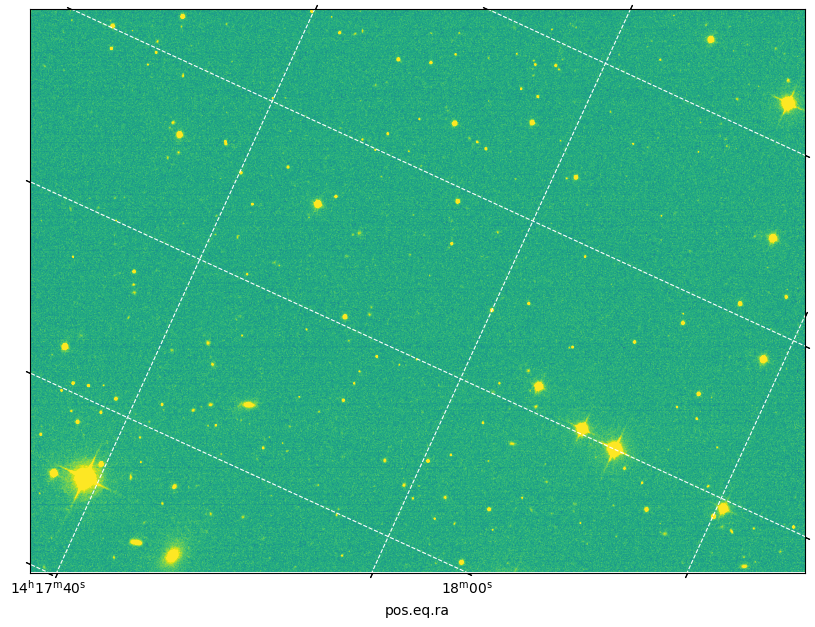

In [19]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=w) 
norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(imgs[0][0].data, norm=norm, origin='lower')
plt.grid(color='white', ls='dashed')
plt.scatter(mi,  53.0595079902, transform=ax.get_transform('icrs'), s=100, edgecolor='white', facecolor='none')
plt.show()

# SDSS SQL query

In [20]:
df_dual = pd.read_csv('./data/FLambdaDualObj.csv', comment='#')
df_dual

TILE_ID  NUMBER  ALPHA_J2000  DELTA_J2000    hpix11     X_IMAGE  \
0         2406       2   214.881557    53.103476  11700101  1756.88098   
1         2406       4   214.861588    53.115839  11700103  1483.69287   
2         2406       9   215.061658    52.998000  11699994  4155.54639   
3         2406      10   215.180854    52.927186  11699984  5755.89111   
4         2406      11   214.907509    53.089148  11700101  2092.67017   
...        ...     ...          ...          ...       ...         ...   
64288     2243   15940   215.064895    52.812546  11699797  6312.52832   
64289     2243   15941   214.688544    53.040802  11699934  1201.92981   
64290     2243   15942   215.186475    52.737363  11699447  7982.65723   
64291     2243   15943   215.084326    52.799349  11699797  6592.61572   
64292     2243   15944   215.068525    52.809148  11699797  6375.31055   

           Y_IMAGE     R_EFF  FWHM_WORLD   A_WORLD  ...  \
0        16.847881  4.717021    0.000920  0.000203  ...   
1        23.799297  2.087801    0.000216  0.000089  ...   
2        27.424644  2.750906    0.000281  0.000112  ...   
3        28.008156  3.174753    0.000259  0.000118  ...   
4        27.677053  6.961071    0.000425  0.000076  ...   
...            ...       ...         ...       ...  ...   
64288  5494.858400  5.580144    0.000434  0.000208  ...   
64289  5523.615230  5.165153    0.000383  0.000080  ...   
64290  5477.959470  2.420266    0.000250  0.000088  ...   
64291  5478.614750  2.749503    0.000376  0.000099  ...   
64292  5481.346680  2.557108    0.000504  0.000099  ...   

                                                   FLAGS  \
0      17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 1...   
1      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
2      16 16 16 17 17 17 17 16 16 16 17 17 17 17 16 1...   
3      16 16 16 17 17 17 17 17 16 16 17 17 17 17 17 1...   
4      18 18 18 19 19 19 19 18 18 18 19 19 19 19 18 1...   
...                                                  ...   
64288  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.398938924 0.671059191 0.671870828 0.0 0.0 0....   
1      0.20837152 0.89839673 0.681177855 0.0 0.0 0.41...   
2      0.217361659 0.913546681 0.701026499 0.0 0.0 0....   
3      0.426156312 0.916839361 0.186319813 0.0 0.0 0....   
4      0.399055988 0.655363321 0.687582672 0.0 0.0 0....   
...                                                  ...   
64288  0.956941068 0.973625004 0.976183474 0.98467809...   
64289  0.947082579 0.965922475 0.944739759 0.96594297...   
64290  0.923828781 0.937540472 0.942529678 0.95318043...   
64291  0.967528522 0.97575736 0.973541498 0.978428304...   
64292  0.960996389 0.972236931 0.977609754 0.99181813...   

                                              MASK_FLAGS  \
0      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
1      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
3      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
4      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
...                                                  ...   
64288  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64289  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64290  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64291  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
64292  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      0 0 0 0 0 0 0 0 0 9 0 0 0 0 9 0 11 0 0 0 0 8 8...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3     

In [21]:
query = f"""
SELECT 
   p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z, p.run, p.camcol, p.field, p.specObjID 
FROM PhotoPrimary AS p 
WHERE p.ra BETWEEN {df_dual['ALPHA_J2000'].min()} AND {df_dual['ALPHA_J2000'].max()} 
    AND p.dec BETWEEN {df_dual['DELTA_J2000'].min()} AND {df_dual['DELTA_J2000'].max()} 
    AND p.r BETWEEN 14 AND 22.0
"""
query

'\nSELECT \n   p.objid, p.ra, p.dec, p.u, p.g, p.r, p.i, p.z, p.run, p.camcol, p.field, p.specObjID \nFROM PhotoPrimary AS p \nWHERE p.ra BETWEEN 213.161125967 AND 215.988942263 \n    AND p.dec BETWEEN 51.8129633849 AND 53.5396054378 \n    AND p.r BETWEEN 14 AND 22.0\n'

In [22]:
res = SDSS.query_sql(query)
df_sdss = res.to_pandas()
df_sdss

objid          ra        dec         u         g  \
0      1237659120396009484  213.173714  52.054696  23.54175  24.21160   
1      1237659120396009497  213.284953  52.150069  23.00651  20.13412   
2      1237659120396009542  213.173444  52.033533  20.31322  19.50751   
3      1237659120396009560  213.343609  52.166511  25.21000  23.16152   
4      1237659120396009567  213.305423  52.066097  20.79481  19.97828   
...                    ...         ...        ...       ...       ...   
35025  1237661417676472896  215.961857  53.503383  22.79385  22.28852   
35026  1237661417676473046  215.962496  53.394133  22.82401  21.00085   
35027  1237661417676473174  215.848647  53.496551  24.61716  23.76118   
35028  1237661417676473244  215.961871  53.510782  24.38936  22.89783   
35029  1237661417676473262  215.938476  53.430130  25.20583  22.92489   

              r         i         z   run  camcol  field            specObjID  
0      21.52299  21.76813  19.56736  3177       5     58                    0  
1      18.69793  17.37887  16.64171  3177       5     58                    0  
2      19.14362  18.95214  18.82354  3177       5     58                    0  
3      21.43444  20.78987  20.16811  3177       5     58                    0  
4      19.94379  19.97257  19.94647  3177       5     58  7591012442874075136  
...         ...       ...       ...   ...     ...    ...                  ...  
35025  21.25153  21.06685  21.17907  3712       4    208                    0  
35026  20.11888  19.71477  19.46750  3712       4    208                    0  
35027  21.70828  21.19379  21.30909  3712       4    208                    0  
35028  21.86166  21.68200  23.80084  3712       4    208                    0  
35029  21.52404  20.37892  19.84470  3712       4    208                    0  

[35030 rows x 12 columns]

In [23]:
# df_sdss.to_csv("./data/sdss_22_init.csv", index=False)
df_sdss_init = pd.read_csv("./data/sdss_22_init.csv")
df_sdss_init

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396075096  213.412466  51.951525  20.21493  19.90540   
3      1237659120396075506  213.451475  51.937997  22.83068  21.99503   
4      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
...                    ...         ...        ...       ...       ...   
35025  1237661417676472975  215.983258  53.474071  22.88614  21.15311   
35026  1237661417676473009  215.960497  53.420538  23.53741  21.92297   
35027  1237661417676473043  215.981068  53.416345  25.33024  22.87429   
35028  1237661417676473237  215.935475  53.495656  23.42707  23.99033   
35029  1237661417676473269  215.982704  53.452228  23.09672  23.17206   

              r         i         z   run  camcol  field            specObjID  
0      20.27203  20.22480  20.04869  3177       5     58  8264196446053750784  
1      21.49035  20.82659  20.30259  3177       5     58                    0  
2      19.92216  19.91556  19.85427  3177       5     59  8264185970158753792  
3      21.38355  20.99575  20.77266  3177       5     59  7912892273452668928  
4      16.18532  16.04713  16.02548  3177       5     60                    0  
...         ...       ...       ...   ...     ...    ...                  ...  
35025  19.90563  19.43522  19.02002  3712       4    208                    0  
35026  20.44479  19.67033  19.23391  3712       4    208                    0  
35027  21.76340  21.29277  20.42080  3712       4    208                    0  
35028  21.88137  21.98825  23.00507  3712       4    208                    0  
35029  21.54395  21.49771  23.16442  3712       4    208                    0  

[35030 rows x 12 columns]

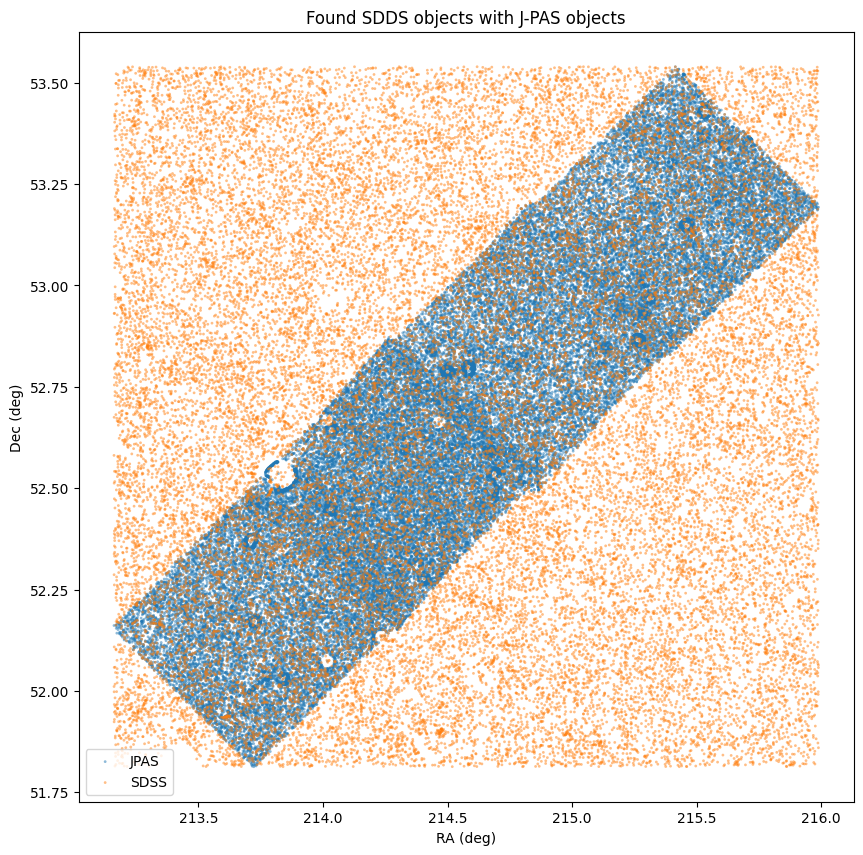

In [24]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=df_sdss_init['ra'], y=df_sdss_init['dec'], s=4,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Found SDDS objects with J-PAS objects')
plt.legend()
plt.show()

In [25]:
jpcas_coords = SkyCoord(ra=df_dual['ALPHA_J2000'], dec=df_dual['DELTA_J2000'], unit=(u.deg, u.deg), frame='icrs')
sdss_coords = SkyCoord(ra=df_sdss_init['ra'], dec=df_sdss_init['dec'], unit=(u.deg, u.deg), frame='icrs')
jpcas_coords[:10]

<SkyCoord (ICRS): (ra, dec) in deg
    [(214.88155692, 53.10347622), (214.86158834, 53.11583931),
     (215.06165824, 52.99799953), (215.18085383, 52.92718615),
     (214.90750932, 53.08914797), (215.02297422, 53.02092993),
     (214.95391176, 53.06188013), (214.87433046, 53.10899829),
     (215.12066902, 52.96337478), (215.30519592, 52.85336498)]>

In [26]:
# remove sdss objects that close 1 arcsec each other
# idx, sep2d, _ = sdss_coords.match_to_catalog_sky(sdss_coords, nthneighbor=2)
# cond = sep2d.arcsec < 1
# sdss_coords = sdss_coords[~cond]
# df_sdss = df_sdss_init[~cond].reset_index()
# df_sdss


In [27]:
idx, sep2d, _ =  sdss_coords.match_to_catalog_sky(jpcas_coords)
idx.shape

(35030,)

In [28]:
df_sdss_init['jpas_idx'] = idx
df_sdss_init['sep2d'] = sep2d.arcsec
df_sdss_init

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396075096  213.412466  51.951525  20.21493  19.90540   
3      1237659120396075506  213.451475  51.937997  22.83068  21.99503   
4      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
...                    ...         ...        ...       ...       ...   
35025  1237661417676472975  215.983258  53.474071  22.88614  21.15311   
35026  1237661417676473009  215.960497  53.420538  23.53741  21.92297   
35027  1237661417676473043  215.981068  53.416345  25.33024  22.87429   
35028  1237661417676473237  215.935475  53.495656  23.42707  23.99033   
35029  1237661417676473269  215.982704  53.452228  23.09672  23.17206   

              r         i         z   run  camcol  field            specObjID  \
0      20.27203  20.22480  20.04869  3177       5     58  8264196446053750784   
1      21.49035  20.82659  20.30259  3177       5     58                    0   
2      19.92216  19.91556  19.85427  3177       5     59  8264185970158753792   
3      21.38355  20.99575  20.77266  3177       5     59  7912892273452668928   
4      16.18532  16.04713  16.02548  3177       5     60                    0   
...         ...       ...       ...   ...     ...    ...                  ...   
35025  19.90563  19.43522  19.02002  3712       4    208                    0   
35026  20.44479  19.67033  19.23391  3712       4    208                    0   
35027  21.76340  21.29277  20.42080  3712       4    208                    0   
35028  21.88137  21.98825  23.00507  3712       4    208                    0   
35029  21.54395  21.49771  23.16442  3712       4    208                    0   

       jpas_idx       sep2d  
0         21721    0.078537  
1         20164    0.052191  
2         19903  116.489557  
3         19980   93.947154  
4         35568    0.282189  
...         ...         ...  
35025     10128  688.462298  
35026     10153  521.038418  
35027     10124  544.963545  
35028     10136  668.844951  
35029     10153  632.359392  

[35030 rows x 14 columns]

In [29]:
cond = df_sdss_init["sep2d"] < 1
df_sdss = df_sdss_init[cond]
sdss_idx = np.array(df_sdss.index)
df_sdss['sdss_idx'] = df_sdss.index
df_sdss.reset_index(inplace=True, drop=True)
df_sdss

C:\Users\kovai\AppData\Local\Temp\ipykernel_10052\3981891386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sdss['sdss_idx'] = df_sdss.index


objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  field            specObjID  \
0      20.27203  20.22480  20.04869  3177       5     58  8264196446053750784   
1      21.49035  20.82659  20.30259  3177       5     58                    0   
2      16.18532  16.04713  16.02548  3177       5     60                    0   
3      21.53168  21.22415  20.97393  3177       5     60  8263060344039299072   
4      17.11214  16.51913  16.20456  3177       6     59                    0   
...         ...       ...       ...   ...     ...    ...                  ...   
11224  21.91027  20.72726  20.93438  3712       3    208                    0   
11225  20.99624  20.11850  19.59448  3712       3    208                    0   
11226  21.32424  23.87182  23.40334  3712       3    208                    0   
11227  17.34359  17.33805  17.37105  3712       3    208                    0   
11228  20.86529  19.70091  20.91512  3712       3    207                    0   

       jpas_idx     sep2d  sdss_idx  
0         21721  0.078537         0  
1         20164  0.052191         1  
2         35568  0.282189         4  
3         30366  0.007762         5  
4         36769  0.158345        15  
...         ...       ...       ...  
11224     26036  0.105546     34974  
11225     10862  0.139786     34975  
11226     11705  0.638891     34976  
11227     33105  0.293103     34977  
11228     33132  0.127277     34978  

[11229 rows x 15 columns]

In [30]:
df_sdss['jpas_idx'].max(), df_sdss['sdss_idx'].max()

(np.int64(64290), np.int64(34978))

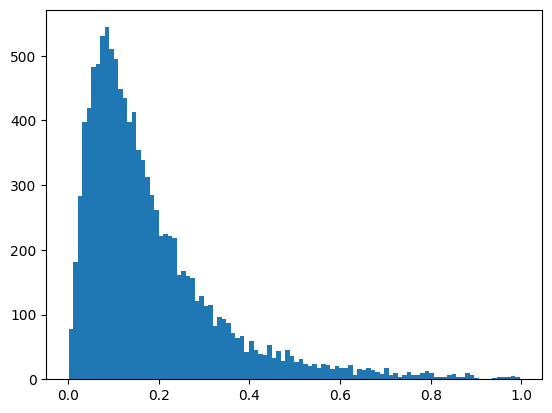

In [31]:
plt.hist(df_sdss['sep2d'], 
         bins=100, 
        #  range=(0, 2)
         )
plt.show()

In [32]:
# df_sdss_init = df_sdss.copy()
# df_sdss = df_sdss.iloc[idx]
# df_sdss

In [33]:
max_sep = 1 * u.arcsec
cond = sep2d < max_sep
# jpcas_matched = jpcas_coords[cond]
# sdss_coords_matched = sdss_coords[idx[cond]]

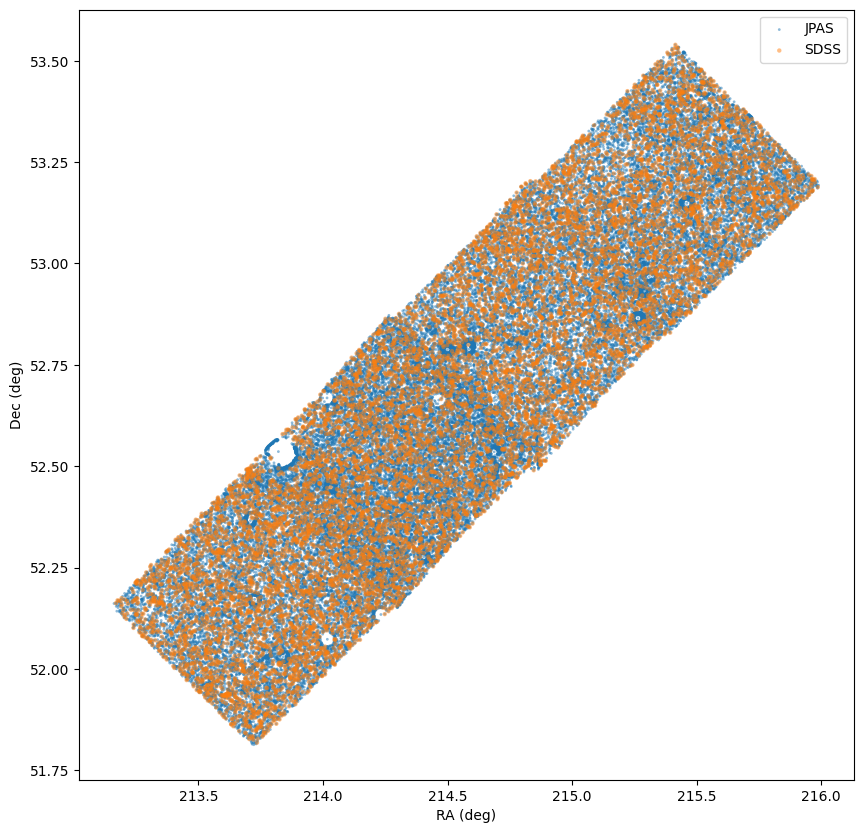

In [34]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_dual['ALPHA_J2000'], y=df_dual['DELTA_J2000'], s=4, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=df_sdss['ra'], y=df_sdss['dec'], s=10,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.legend()
plt.show()

# SDSS images

In [35]:
df_runs = df_sdss.value_counts(['run', 'camcol', 'field'])
df_runs

run   camcol  field
3177  6       61       443
              60       409
3180  5       66       398
3705  2       111      397
              113      384
      1       112      382
      2       112      373
3180  5       64       368
              65       360
3712  1       205      356
      2       205      352
3177  5       60       351
3712  3       207      343
3177  6       59       343
3712  1       204      342
3705  1       111      338
              110      332
3712  2       207      324
              206      322
3705  3       112      321
3712  1       206      318
      3       208      317
              206      273
3177  5       59       270
      6       62       253
3705  3       113      238
3177  5       61       200
3180  5       67       163
3712  1       203      160
      2       204      156
3180  6       67       150
3712  3       205      144
3180  6       66       142
3705  1       113      140
3180  6       65       139
3705  2       114      131
3177  5 

In [36]:
run, camcol, field = df_runs.index[0]
imgs = SDSS.get_images(run=run, camcol=camcol, field=field)
w = WCS(imgs[0][0].header)
data = imgs[0][0].data

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [37]:
cat_pixels = w.all_world2pix(df_sdss['ra'], df_sdss['dec'], 0)
cond_phot = ((cat_pixels[0] > 0) & (cat_pixels[0] < data.shape[1]) 
             & (cat_pixels[1] > 0) & (cat_pixels[1] < data.shape[0])
             & (df_sdss['r'] < 22)
)
cond_spec = cond_phot & (df_sdss['specObjID'] != 0)

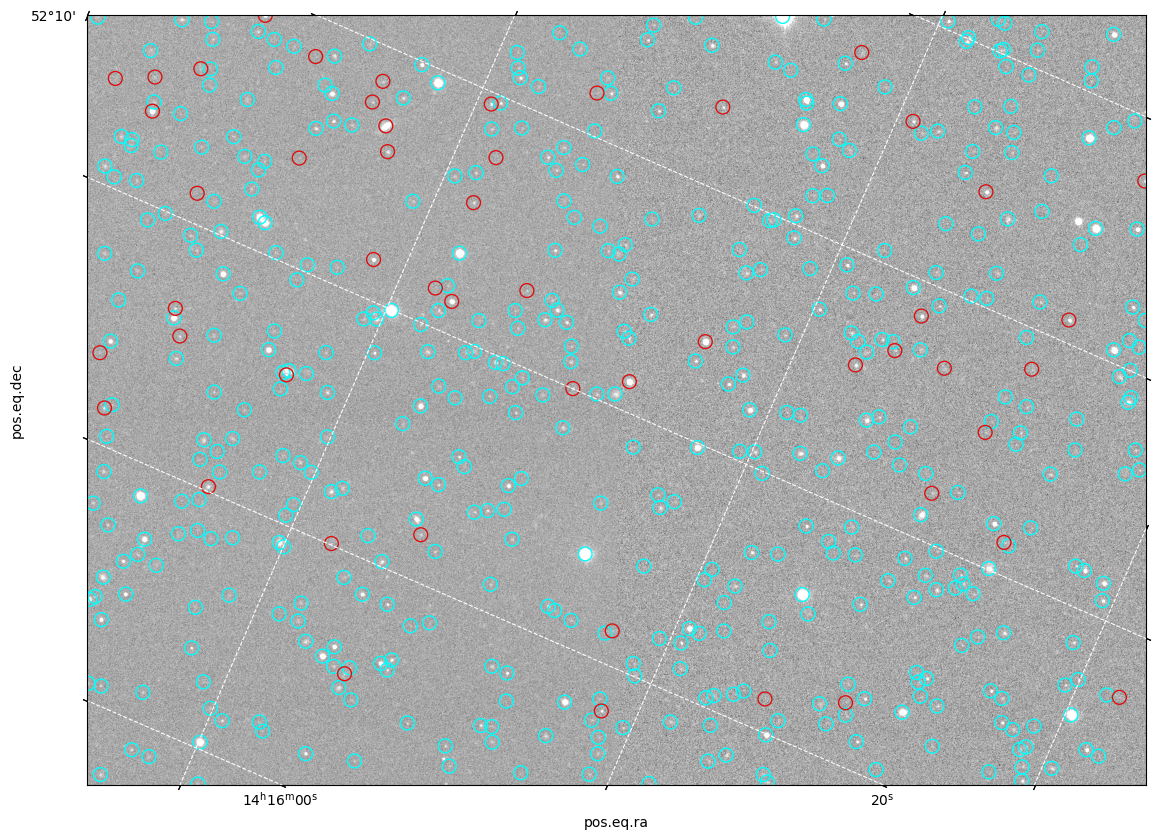

In [38]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection=w) 
norm = simple_norm(data, 'sqrt', percent=99.5)
plt.imshow(imgs[0][0].data, norm=norm, origin='lower', cmap='gray')
plt.grid(color='white', ls='dashed')
plt.scatter(df_sdss.loc[cond_phot, 'ra'],  df_sdss.loc[cond_phot, 'dec'], 
            transform=ax.get_transform('icrs'), s=100, 
            alpha = 1.0,
            edgecolor='cyan', facecolor='none')
plt.scatter(df_sdss.loc[cond_spec, 'ra'],  df_sdss.loc[cond_spec, 'dec'], 
            transform=ax.get_transform('icrs'), s=100, 
            alpha = 1.0,
            edgecolor='red', facecolor='none')
plt.show()

# Merge SDSS and JPAS data

In [39]:
df_merged = pd.merge(df_sdss, df_dual, left_on="jpas_idx", right_index=True, how="left")
df_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...  \
0      20.27203  20.22480  20.04869  3177       5  ...   
1      21.49035  20.82659  20.30259  3177       5  ...   
2      16.18532  16.04713  16.02548  3177       5  ...   
3      21.53168  21.22415  20.97393  3177       5  ...   
4      17.11214  16.51913  16.20456  3177       6  ...   
...         ...       ...       ...   ...     ...  ...   
11224  21.91027  20.72726  20.93438  3712       3  ...   
11225  20.99624  20.11850  19.59448  3712       3  ...   
11226  21.32424  23.87182  23.40334  3712       3  ...   
11227  17.34359  17.33805  17.37105  3712       3  ...   
11228  20.86529  19.70091  20.91512  3712       3  ...   

                                                   FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
3      2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.834888518 0.908564031 0.881216109 0.76730591...   
1      0.358021438 0.863625467 0.837734342 0.60550808...   
2      0.843501151 0.938937485 0.930738449 0.95939755...   
3      0.824712574 0.934744418 0.926468432 0.95994961...   
4      0.957991719 0.973127425 0.95770663 0.963621497...   
...                                                  ...   
11224  0.953193843 0.953127265 0.965504646 0.95732945...   
11225  0.925203025 0.953963995 0.953043461 0.96724385...   
11226  0.945254445 0.958298683 0.951704025 0.96742147...   
11227  0.950828016 0.972253084 0.981332958 0.98112016...   
11228  0.649722457 0.825321734 0.815792382 0.86114645...   

                                              MASK_FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      1040 675 1732 1509 835 803 2049 2081 1019 3039...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2455 0...   
2      814 515 1302 1167 614 595 1542 1528 714 2140 1...   
3      899 0 1454 1302 0 0 0 0 0 2462 1763 1

<Axes: >

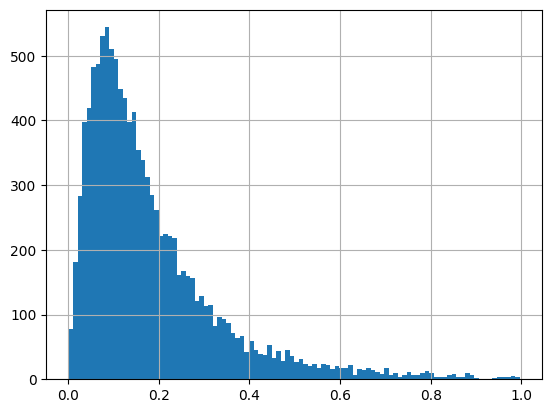

In [40]:
df_merged['sep2d'].hist(bins=100)

In [41]:
df_merged.to_csv('./data/merged3.csv', index=False)
df_merged = pd.read_csv('./data/merged3.csv')
df_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...  \
0      20.27203  20.22480  20.04869  3177       5  ...   
1      21.49035  20.82659  20.30259  3177       5  ...   
2      16.18532  16.04713  16.02548  3177       5  ...   
3      21.53168  21.22415  20.97393  3177       5  ...   
4      17.11214  16.51913  16.20456  3177       6  ...   
...         ...       ...       ...   ...     ...  ...   
11224  21.91027  20.72726  20.93438  3712       3  ...   
11225  20.99624  20.11850  19.59448  3712       3  ...   
11226  21.32424  23.87182  23.40334  3712       3  ...   
11227  17.34359  17.33805  17.37105  3712       3  ...   
11228  20.86529  19.70091  20.91512  3712       3  ...   

                                                   FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
3      2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.834888518 0.908564031 0.881216109 0.76730591...   
1      0.358021438 0.863625467 0.837734342 0.60550808...   
2      0.843501151 0.938937485 0.930738449 0.95939755...   
3      0.824712574 0.934744418 0.926468432 0.95994961...   
4      0.957991719 0.973127425 0.95770663 0.963621497...   
...                                                  ...   
11224  0.953193843 0.953127265 0.965504646 0.95732945...   
11225  0.925203025 0.953963995 0.953043461 0.96724385...   
11226  0.945254445 0.958298683 0.951704025 0.96742147...   
11227  0.950828016 0.972253084 0.981332958 0.98112016...   
11228  0.649722457 0.825321734 0.815792382 0.86114645...   

                                              MASK_FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      1040 675 1732 1509 835 803 2049 2081 1019 3039...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2455 0...   
2      814 515 1302 1167 614 595 1542 1528 714 2140 1...   
3      899 0 1454 1302 0 0 0 0 0 2462 1763 1

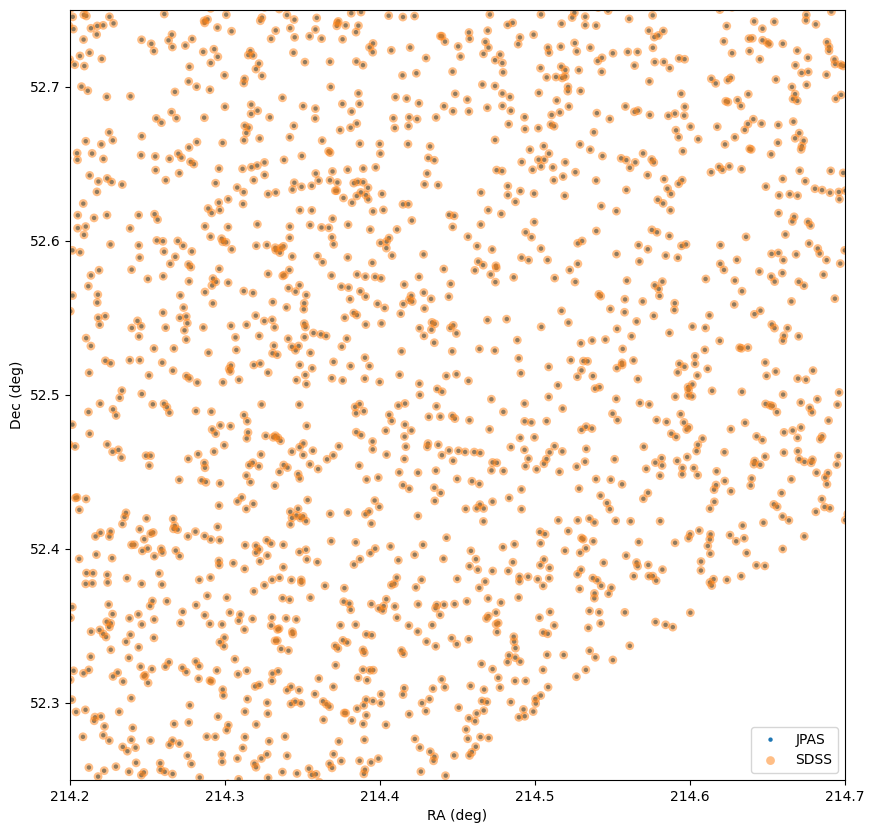

In [42]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(x=df_merged['ALPHA_J2000'], y=df_merged['DELTA_J2000'], s=10, 
            edgecolors='none', alpha=1.0, label='JPAS')
plt.scatter(x=df_merged['ra'], y=df_merged['dec'], s=40,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.xlim(214.2, 214.7)
plt.ylim(52.25, 52.75)
plt.legend()
plt.show()

# Flux analysis

In [43]:
df_merged = pd.read_csv('./data/merged3.csv')
df_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...  \
0      20.27203  20.22480  20.04869  3177       5  ...   
1      21.49035  20.82659  20.30259  3177       5  ...   
2      16.18532  16.04713  16.02548  3177       5  ...   
3      21.53168  21.22415  20.97393  3177       5  ...   
4      17.11214  16.51913  16.20456  3177       6  ...   
...         ...       ...       ...   ...     ...  ...   
11224  21.91027  20.72726  20.93438  3712       3  ...   
11225  20.99624  20.11850  19.59448  3712       3  ...   
11226  21.32424  23.87182  23.40334  3712       3  ...   
11227  17.34359  17.33805  17.37105  3712       3  ...   
11228  20.86529  19.70091  20.91512  3712       3  ...   

                                                   FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
2      3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...   
3      2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           NORM_WMAP_VAL  \
0      0.834888518 0.908564031 0.881216109 0.76730591...   
1      0.358021438 0.863625467 0.837734342 0.60550808...   
2      0.843501151 0.938937485 0.930738449 0.95939755...   
3      0.824712574 0.934744418 0.926468432 0.95994961...   
4      0.957991719 0.973127425 0.95770663 0.963621497...   
...                                                  ...   
11224  0.953193843 0.953127265 0.965504646 0.95732945...   
11225  0.925203025 0.953963995 0.953043461 0.96724385...   
11226  0.945254445 0.958298683 0.951704025 0.96742147...   
11227  0.950828016 0.972253084 0.981332958 0.98112016...   
11228  0.649722457 0.825321734 0.815792382 0.86114645...   

                                              MASK_FLAGS  \
0      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
1      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
3      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
...                                                  ...   
11224  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11225  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11226  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11227  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   
11228  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...   

                                           SINGLE_DETECT  \
0      1040 675 1732 1509 835 803 2049 2081 1019 3039...   
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2455 0...   
2      814 515 1302 1167 614 595 1542 1528 714 2140 1...   
3      899 0 1454 1302 0 0 0 0 0 2462 1763 1

In [44]:
def to_array(x):
    return np.array([float(i) for i in x.split()])

df_flux = df_merged['FLUX_AUTO']
df_filter = pd.read_csv('./data/jpas_filters.csv', comment='#')
df_wavelength = df_filter['wavelength']
df_flux = df_flux.str.split(' ', expand=True).astype(float)
df_flux.columns = [df_filter['wavelength'][i] for i in df_flux.columns]
df_flux

3497         3782         3904         3996         4110  \
0       428.658691   308.865997   384.882080   278.647003   361.446442   
1        45.592281    21.972923    37.954308    22.007618    12.640756   
2      6429.231930  6839.234380  6717.179690  8188.373540  9891.036130   
3        47.624756   118.164040    49.091167    56.439217    89.834892   
4       331.251312   372.356964   411.324707   643.066467  1033.802250   
...            ...          ...          ...          ...          ...   
11224    30.285538    10.193165     5.936443    21.126848    17.796532   
11225    15.927616    -1.225395    21.939760   -29.822462    24.239641   
11226   -36.947594   106.413177    32.062771    43.588150    54.667030   
11227  3147.098880  3940.674070  4550.967290  4933.861820  4857.057130   
11228   -37.374016    53.200993    22.461540    24.361391    30.019119   

              4203         4303         4403          4503          4603  ...  \
0       329.904541   373.368713   294.262573    388.088928    303.253723  ...   
1        39.618355    21.870281    32.347305    -28.031401     23.629484  ...   
2      9819.850590  9222.009770  9935.850590  10933.725600  10905.127900  ...   
3        16.295548    74.441139    64.283310     70.093681     47.715321  ...   
4       887.056641  1059.994510  1540.379270   1986.656130   2288.412110  ...   
...            ...          ...          ...           ...           ...  ...   
11224   -24.746517    22.876118    39.852066     -0.240590      4.930181  ...   
11225   -11.013321    29.881607    13.242824     22.658485     38.121796  ...   
11226   107.455605    47.222183    63.994282    162.226089     70.151825  ...   
11227  5259.936040  4655.021480  4700.866700   4793.632320   4718.938960  ...   
11228     4.391259    17.691521   -11.383204    -72.926178     28.984285  ...   

              8716         8810         8912         9000         9107  \
0       115.620277   121.908005   109.617432    85.042366    80.784210   
1        10.348244     9.803634    -4.148968    19.073219     4.000984   
2      5574.808110  5550.260250  5090.215820  4869.805660  5064.409180   
3        39.833759     8.877821    51.904533    40.474384    40.142117   
4      4573.188960  4554.304200  4338.682620  4247.596190  4394.168950   
...            ...          ...          ...          ...          ...   
11224     9.100890    65.591621    36.135643    44.240223   -10.062006   
11225   122.078468   136.488647   130.862381   131.511703   155.036331   
11226    16.436688    -5.416476    -2.866711   -28.517208   -22.368950   
11227  1433.196410  1428.044430  1422.888670  1416.839600  1400.028200   
11228    19.884501    21.141523   -21.383547    16.180847    -0.673573   

              9316         3623          4750         6250         7725  
0        77.960510   348.759430    290.605560   189.218094   163.329941  
1         8.714289    34.998966     30.923809    70.149841    79.484497  
2      4517.976070  6254.568360  10038.346700  9067.625000  6860.720210  
3        34.061413    45.039337     70.858406    49.707184    45.483406  
4      4252.207030   396.522980   2037.473510  3981.002690  4632.118650  
...            ...          ...           ...          ...          ...  
11224    21.221300    -4.004103     14.583567    26.111908    25.467243  
11225   140.461609     6.092162     27.302874    86.375099   140.202820  
11226    11.541579    10.152276     47.978416    36.766716    33.168705  
11227  1135.339600  3628.869870   4287.578610  3004.959470  1978.652100  
11228   -13.094439    45.989357     11.591095    11.028273    12.593917  

[11229 rows x 60 columns]

Task:
Take JPAS band fluxes at 6000A and the SDSS r band magnitude
build a plot of the JPAS flux 6000A vs the SDSS r band magnitude
mag = -2.5 * log10(flux) 

$ 26 -2.5 log(row)$

In [45]:
df = pd.DataFrame(df_flux.columns[:-4])
df['diff'] = df.diff()
df 


0   diff
0   3497    NaN
1   3782  285.0
2   3904  122.0
3   3996   92.0
4   4110  114.0
5   4203   93.0
6   4303  100.0
7   4403  100.0
8   4503  100.0
9   4603  100.0
10  4701   98.0
11  4799   98.0
12  4902  103.0
13  5002  100.0
14  5097   95.0
15  5202  105.0
16  5296   94.0
17  5389   93.0
18  5498  109.0
19  5596   98.0
20  5701  105.0
21  5803  102.0
22  5917  114.0
23  6010   93.0
24  6107   97.0
25  6206   99.0
26  6309  103.0
27  6408   99.0
28  6506   98.0
29  6607  101.0
30  6710  103.0
31  6812  102.0
32  6912  100.0
33  7007   95.0
34  7119  112.0
35  7207   88.0
36  7307  100.0
37  7414  107.0
38  7502   88.0
39  7602  100.0
40  7719  117.0
41  7811   92.0
42  7907   96.0
43  8009  102.0
44  8124  115.0
45  8226  102.0
46  8329  103.0
47  8429  100.0
48  8523   94.0
49  8620   97.0
50  8716   96.0
51  8810   94.0
52  8912  102.0
53  9000   88.0
54  9107  107.0
55  9316  209.0

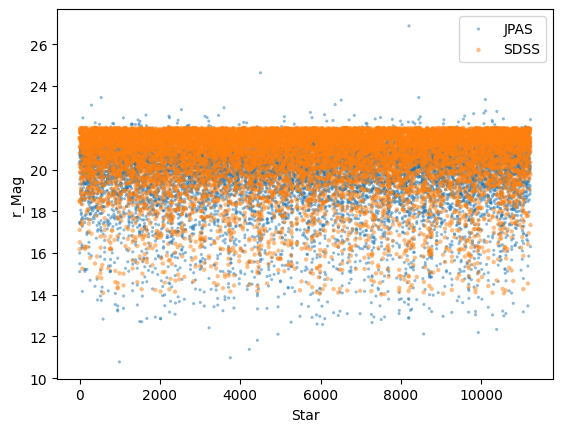

In [46]:
rSDSS_ID = 58 
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged['r']})
r_mags['r_jpas'] = r_mags['r_jpas'].apply(lambda row : -2.5 * np.log10(row * 1e-10))
# figure1 = plt.figure(figsize=(10, 10))
plt.scatter(x=r_mags.index, y=r_mags['r_jpas'], s=5, 
            edgecolors='none', alpha=0.5, label='JPAS')
plt.scatter(x=r_mags.index, y=r_mags['r_sdss'], s=10,
             edgecolors='none', alpha=0.5, label='SDSS')
plt.xlabel('Star')
plt.ylabel('r_Mag')
plt.legend()
plt.show()

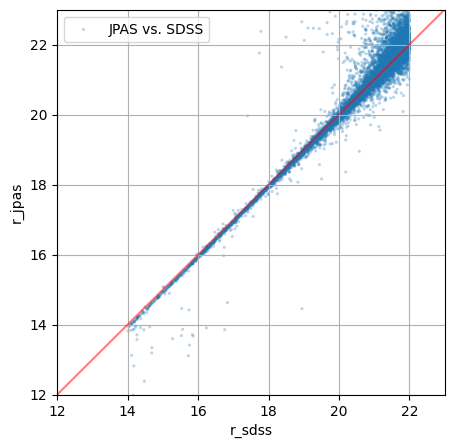

In [47]:
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged['r']})

r_mags['r_jpas_mag'] = r_mags['r_jpas'].apply(lambda row : 26-2.5 * np.log10(row))

figure1 = plt.figure(figsize=(5, 5))
plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas_mag'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.xlim(12, 23)
plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()

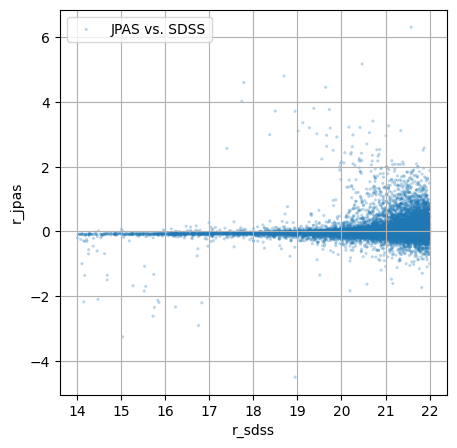

In [48]:
figure1 = plt.figure(figsize=(5, 5))
# plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas_mag']-r_mags['r_sdss'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
# plt.xlim(12, 23)
# plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()

In [49]:
result = sigma_clip(r_mags['r_jpas_mag']-r_mags['r_sdss'], sigma=3, cenfunc=np.median)

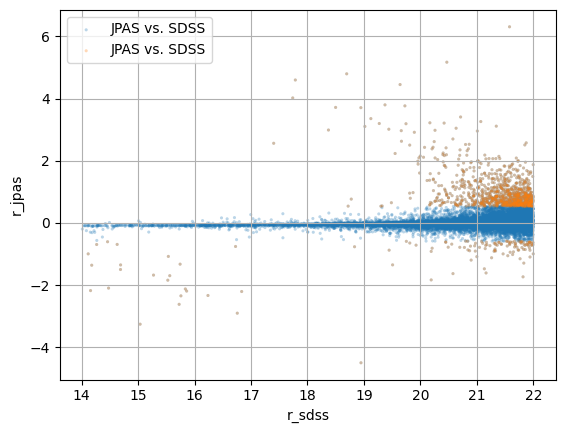

In [50]:
x = r_mags['r_sdss']
y = r_mags['r_jpas_mag']-r_mags['r_sdss']

plt.scatter(x, y, s=5, edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.scatter(x[result.mask], y[result.mask], s=5, edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.grid()
plt.legend()
plt.show()

Task: remove outliers using sigma clip method.
Merge df_merge with df_flux columns

C:\Users\kovai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:197: UserWarning: Warning: converting a masked element to nan.
  offsets = np.asanyarray(offsets, float)


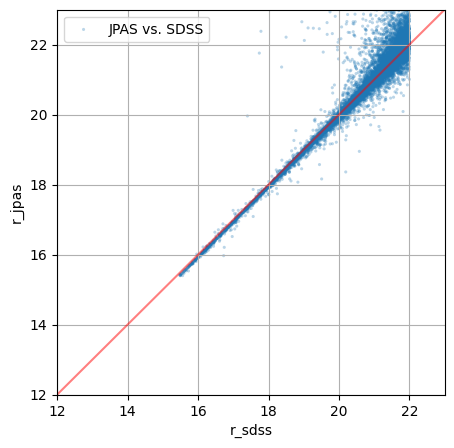

In [51]:
filtered_mags = sigma_clip(r_mags, sigma=4, maxiters=None, cenfunc='median', masked=True)
r_jpas = {}
r_sdss = {}

for i  in range(len(filtered_mags)):
    r_jpas[i] = filtered_mags[i][2]
    r_sdss[i] = filtered_mags[i][1]

r_mags_filtered = pd.DataFrame({'r_sdss': r_sdss,
                                'r_jpas': r_jpas})

figure1 = plt.figure(figsize=(5, 5))
plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags_filtered['r_sdss'], y=r_mags_filtered['r_jpas'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.xlim(12, 23)
plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()

In [52]:
df_flux_merged = df_merged
columns = df_flux.columns.values.tolist()
for column in columns:
    df_flux_merged[column] = df_flux[column]
    
df_flux_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...         8716  \
0      20.27203  20.22480  20.04869  3177       5  ...   115.620277   
1      21.49035  20.82659  20.30259  3177       5  ...    10.348244   
2      16.18532  16.04713  16.02548  3177       5  ...  5574.808110   
3      21.53168  21.22415  20.97393  3177       5  ...    39.833759   
4      17.11214  16.51913  16.20456  3177       6  ...  4573.188960   
...         ...       ...       ...   ...     ...  ...          ...   
11224  21.91027  20.72726  20.93438  3712       3  ...     9.100890   
11225  20.99624  20.11850  19.59448  3712       3  ...   122.078468   
11226  21.32424  23.87182  23.40334  3712       3  ...    16.436688   
11227  17.34359  17.33805  17.37105  3712       3  ...  1433.196410   
11228  20.86529  19.70091  20.91512  3712       3  ...    19.884501   

              8810         8912         9000         9107         9316  \
0       121.908005   109.617432    85.042366    80.784210    77.960510   
1         9.803634    -4.148968    19.073219     4.000984     8.714289   
2      5550.260250  5090.215820  4869.805660  5064.409180  4517.976070   
3         8.877821    51.904533    40.474384    40.142117    34.061413   
4      4554.304200  4338.682620  4247.596190  4394.168950  4252.207030   
...            ...          ...          ...          ...          ...   
11224    65.591621    36.135643    44.240223   -10.062006    21.221300   
11225   136.488647   130.862381   131.511703   155.036331   140.461609   
11226    -5.416476    -2.866711   -28.517208   -22.368950    11.541579   
11227  1428.044430  1422.888670  1416.839600  1400.028200  1135.339600   
11228    21.141523   -21.383547    16.180847    -0.673573   -13.094439   

              3623          4750         6250         7725  
0       348.759430    290.605560   189.218094   163.329941  
1        34.998966     30.923809    70.149841    79.484497  
2      6254.568360  10038.346700  9067.625000  6860.720210  
3        45.039337     70.858406    49.707184    45.483406  
4       396.522980   2037.473510  3981.002690  4632.118650  
...            ...           ...          ...          ...  
11224    -4.004103     14.583567    26.111908    25.467243  
11225     6.092162     27.302874    86.375099   140.202820  
11226    10.152276     47.978416    36.766716    33.168705  
11227  3628.869870   4287.578610  3004.959470  1978.652100  
11228    45.989357     11.591095    11.028273    12.593917  

[11229 rows x 127 columns]

# Compare SDSS spectra with JPAS

In [53]:
df_merged = pd.read_csv('./data/merged2.csv')
df_merged

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...            specObjID  \
0      20.27203  20.22480  20.04869  3177       5  ...  8264196446053750784   
1      21.49035  20.82659  20.30259  3177       5  ...                    0   
2      16.18532  16.04713  16.02548  3177       5  ...                    0   
3      21.53168  21.22415  20.97393  3177       5  ...  8263060344039299072   
4      17.11214  16.51913  16.20456  3177       6  ...                    0   
...         ...       ...       ...   ...     ...  ...                  ...   
11224  21.91027  20.72726  20.93438  3712       3  ...                    0   
11225  20.99624  20.11850  19.59448  3712       3  ...                    0   
11226  21.32424  23.87182  23.40334  3712       3  ...                    0   
11227  17.34359  17.33805  17.37105  3712       3  ...                    0   
11228  20.86529  19.70091  20.91512  3712       3  ...                    0   

       jpas_idx     sep2d  sdss_idx  ALPHA_J2000  DELTA_J2000  \
0         21721  0.078537         0   213.268111    52.116478   
1         20164  0.052191         1   213.203459    52.128431   
2         35568  0.282189         4   213.759182    52.055734   
3         30366  0.007762         5   213.686463    52.010739   
4         36769  0.158345        15   213.651566    52.329213   
...         ...       ...       ...          ...          ...   
11224     26036  0.105546     34974   215.786123    53.159128   
11225     10862  0.139786     34975   215.646403    53.094310   
11226     11705  0.638891     34976   215.627436    53.081669   
11227     33105  0.293103     34977   215.599807    53.166198   
11228     33132  0.127277     34978   215.466440    53.244545   

                                               FLUX_AUTO  \
0      428.658691 308.865997 384.88208 278.647003 361...   
1      45.5922813 21.9729233 37.9543076 22.007618 12....   
2      6429.23193 6839.23438 6717.17969 8188.37354 98...   
3      47.6247559 118.16404 49.0911674 56.4392166 89....   
4      331.251312 372.356964 411.324707 643.066467 10...   
...                                                  ...   
11224  30.2855377 10.1931648 5.93644333 21.1268482 17...   
11225  15.9276161 -1.2253952 21.9397602 -29.8224621 2...   
11226  -36.9475937 106.413177 32.0627708 43.58815 54....   
11227  3147.09888 3940.67407 4550.96729 4933.86182 48...   
11228  -37.3740158 53.2009926 22.4615402 24.3613911 3...   

                                        FLUX_RELERR_AUTO CLASS_STAR  TILE_ID  
0      0.053864 0.14563 0.043213 0.078796 0.111389 0....      0.054     2470  
1      0.659668 2.046875 0.423828 1.140625 0.45166 1....      0.012     2470  
2      0.006107 0.011581 0.004803 0.005161 0.006771 0...      0.864     2470  
3      0.421387 0.322998 0.286865 0.317627 0.381836 2...      0.544     2470  
4      0.102722 0.186157 0.061005 0.05188 0.060608 0....      0.852     2470  
...                                                  ...        ...      ...  
11224  1.010742 3.609375 2.679688 1.202148 1.174805 -...      0.002     2406  
11225  1.392578 -9.703125 0.501953 -0.269287 0.589355...     

In [54]:
cond_sp = df_merged["specObjID"] != 0
df_spectra = df_merged[cond_sp]
df_spectra

objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
5      1237659120932946122  213.664015  52.332964  18.30812  17.05585   
7      1237659120933011596  213.902963  52.353935  19.72268  18.67755   
8      1237659120933077046  214.196691  52.187573  18.83820  18.67367   
...                    ...         ...        ...       ...       ...   
11145  1237661417139601878  215.704569  53.159051  23.33864  22.86068   
11169  1237661417139667276  215.835027  53.108864  22.48393  22.27314   
11211  1237661417139602077  215.789805  53.126457  24.66537  22.16327   
11217  1237661417139602259  215.760706  53.065942  22.47651  22.96678   
11219  1237661417139667263  215.809190  53.087111  24.49966  21.69971   

              r         i         z   run  camcol  ...            specObjID  \
0      20.27203  20.22480  20.04869  3177       5  ...  8264196446053750784   
3      21.53168  21.22415  20.97393  3177       5  ...  8263060344039299072   
5      16.51419  16.17959  15.96227  3177       6  ...  1176668252705679360   
7      18.44249  18.34934  18.35769  3177       6  ...  7916336768504584192   
8      18.52811  18.48701  18.25863  3177       6  ...  8263039453318371328   
...         ...       ...       ...   ...     ...  ...                  ...   
11145  21.67510  20.65716  20.11752  3712       3  ...  7916369478975510528   
11169  21.35602  20.75530  20.32749  3712       3  ...  7803655242453899264   
11211  21.94282  21.60790  20.54971  3712       3  ...  7804781142511736832   
11217  21.95869  21.00141  20.66590  3712       3  ...  5648683084343957504   
11219  19.82949  19.01523  18.41696  3712       3  ...  7562893257325434880   

       jpas_idx     sep2d  sdss_idx  ALPHA_J2000  DELTA_J2000  \
0         21721  0.078537         0   213.268111    52.116478   
3         30366  0.007762         5   213.686463    52.010739   
5         50353  0.093424        16   213.664016    52.332990   
7         46217  0.058009        18   213.902943    52.353925   
8         45229  0.084024        19   214.196729    52.187570   
...         ...       ...       ...          ...          ...   
11145     29203  0.131109     34545   215.704535    53.159082   
11169     27246  0.255596     34579   215.835143    53.108850   
11211     27944  0.607428     34862   215.789996    53.126581   
11217     33239  0.187739     34868   215.760782    53.065917   
11219     29866  0.042393     34878   215.809206    53.087118   

                                               FLUX_AUTO  \
0      428.658691 308.865997 384.88208 278.647003 361...   
3      47.6247559 118.16404 49.0911674 56.4392166 89....   
5      4384.12012 3692.74097 4404.73828 4919.50244 56...   
7      1154.49097 1403.51221 1540.85352 1588.30054 16...   
8      2070.7041 4365.03711 3768.60303 2284.63721 206...   
...                                                  ...   
11145  -55.3089027 -16.1262054 45.5122337 64.349884 3...   
11169  84.4732208 -122.202805 109.242523 105.57756 54...   
11211  73.1127701 13.8057632 49.5059929 44.821209 76....   
11217  6.60819817 -54.4708405 32.916275 23.4530468 -2...   
11219  3.54438567 21.9828224 83.0794067 9.35395241 32...   

                                        FLUX_RELERR_AUTO CLASS_STAR  TILE_ID  
0      0.053864 0.14563 0.043213 0.078796 0.111389 0....      0.054     2470  
3      0.421387 0.322998 0.286865 0.317627 0.381836 2...      0.544     2470  
5      0.037903 0.08667 0.027634 0.032654 0.049713 0....      0.001     2470  
7      0.025726 0.045441 0.01532 0.019165 0.031891 0....      0.877     2470  
8      0.013824 0.0149 0.006741 0.012909 0.024445 0.0...      0.869     2470  
...                                                  ...        ...      ...  
11145  -0.420166 -1.219727 0.406494 0.451904 0.750977...      0.003     2406  
11169  0.740234 -0.269531 0.468506 0.489746 0.79248 1...     

In [55]:
idx = 7
coords_sp = SkyCoord(ra=df_spectra.loc[idx, 'ra'], dec=df_spectra.loc[idx, 'dec'], unit=(u.deg, u.deg), frame='icrs')
result = SDSS.get_spectra(coordinates=coords_sp, radius=1*u.arcsec)
result[0].writeto(f'./data/spectra_{idx:06d}.fits', overwrite=True)
# pkl.dump(result, open(f'./data/spectra_{idx:06d}.pkl', 'wb'))

In [56]:
result = fits.open(f'./data/spectra_{idx:06d}.fits')
result.info()

Filename: ./data/spectra_000007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     123   ()      
  1  COADD         1 BinTableHDU     26   4623R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPALL         1 BinTableHDU    488   1R x 236C   [27A, 14A, 4A, E, E, J, J, E, J, E, E, E, K, K, K, K, K, K, K, K, K, B, B, J, I, 5E, 5E, J, J, J, J, 7A, 7A, 16A, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, 5E, E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 16A, 9A, 12A, E, E, E, E, E, E, E, E, J, E, E, J, J, 6A, 21A, E, 35E, K, 19A, 19A, 19A, B, B, B, I, 3A, B, I, I, I, I, J, E, J, J, E, E, E, E, E, E, E, E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5J, 5J, 5J, 5E, 5J, 75E, 75E, 5E, 5E, 5E, 5J, 5E, D, D, D, D, D, D, D, D, D, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5

In [57]:
data = result[1].data

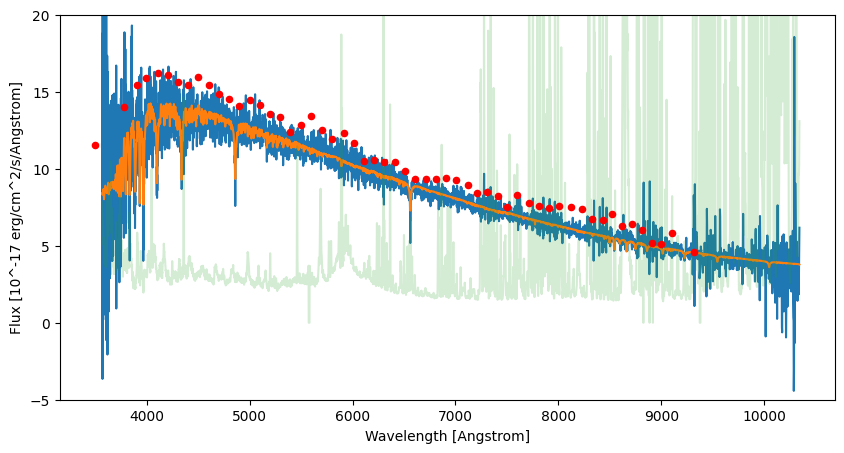

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(10**data['loglam'], data['flux'])
plt.plot(10**data['loglam'], data['model'])
plt.plot(10**data['loglam'], data['sky'], alpha=0.2)

plt.scatter(df_flux.columns[:-4], df_flux.loc[idx, :].values[:-4] / 100,
            color='red', s=20, zorder=10)
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux [10^-17 erg/cm^2/s/Angstrom]')
plt.ylim(-5, 20)
plt.show()

TODO: Get classification from SDSS df_spectra, and redshift (z)
Compare: PhotoPrymary, Spectra, and JPAS calsses.


In [59]:
df_flux

3497         3782         3904         3996         4110  \
0       428.658691   308.865997   384.882080   278.647003   361.446442   
1        45.592281    21.972923    37.954308    22.007618    12.640756   
2      6429.231930  6839.234380  6717.179690  8188.373540  9891.036130   
3        47.624756   118.164040    49.091167    56.439217    89.834892   
4       331.251312   372.356964   411.324707   643.066467  1033.802250   
...            ...          ...          ...          ...          ...   
11224    30.285538    10.193165     5.936443    21.126848    17.796532   
11225    15.927616    -1.225395    21.939760   -29.822462    24.239641   
11226   -36.947594   106.413177    32.062771    43.588150    54.667030   
11227  3147.098880  3940.674070  4550.967290  4933.861820  4857.057130   
11228   -37.374016    53.200993    22.461540    24.361391    30.019119   

              4203         4303         4403          4503          4603  ...  \
0       329.904541   373.368713   294.262573    388.088928    303.253723  ...   
1        39.618355    21.870281    32.347305    -28.031401     23.629484  ...   
2      9819.850590  9222.009770  9935.850590  10933.725600  10905.127900  ...   
3        16.295548    74.441139    64.283310     70.093681     47.715321  ...   
4       887.056641  1059.994510  1540.379270   1986.656130   2288.412110  ...   
...            ...          ...          ...           ...           ...  ...   
11224   -24.746517    22.876118    39.852066     -0.240590      4.930181  ...   
11225   -11.013321    29.881607    13.242824     22.658485     38.121796  ...   
11226   107.455605    47.222183    63.994282    162.226089     70.151825  ...   
11227  5259.936040  4655.021480  4700.866700   4793.632320   4718.938960  ...   
11228     4.391259    17.691521   -11.383204    -72.926178     28.984285  ...   

              8716         8810         8912         9000         9107  \
0       115.620277   121.908005   109.617432    85.042366    80.784210   
1        10.348244     9.803634    -4.148968    19.073219     4.000984   
2      5574.808110  5550.260250  5090.215820  4869.805660  5064.409180   
3        39.833759     8.877821    51.904533    40.474384    40.142117   
4      4573.188960  4554.304200  4338.682620  4247.596190  4394.168950   
...            ...          ...          ...          ...          ...   
11224     9.100890    65.591621    36.135643    44.240223   -10.062006   
11225   122.078468   136.488647   130.862381   131.511703   155.036331   
11226    16.436688    -5.416476    -2.866711   -28.517208   -22.368950   
11227  1433.196410  1428.044430  1422.888670  1416.839600  1400.028200   
11228    19.884501    21.141523   -21.383547    16.180847    -0.673573   

              9316         3623          4750         6250         7725  
0        77.960510   348.759430    290.605560   189.218094   163.329941  
1         8.714289    34.998966     30.923809    70.149841    79.484497  
2      4517.976070  6254.568360  10038.346700  9067.625000  6860.720210  
3        34.061413    45.039337     70.858406    49.707184    45.483406  
4      4252.207030   396.522980   2037.473510  3981.002690  4632.118650  
...            ...          ...           ...          ...          ...  
11224    21.221300    -4.004103     14.583567    26.111908    25.467243  
11225   140.461609     6.092162     27.302874    86.375099   140.202820  
11226    11.541579    10.152276     47.978416    36.766716    33.168705  
11227  1135.339600  3628.869870   4287.578610  3004.959470  1978.652100  
11228   -13.094439    45.989357     11.591095    11.028273    12.593917  

[11229 rows x 60 columns]

# Interpolate

In [60]:
from scipy import interpolate

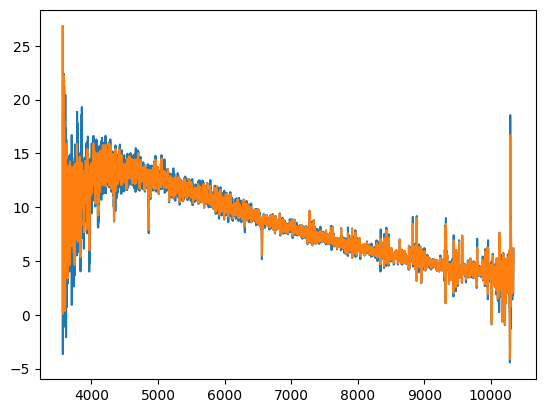

wavelength       flux
0      3567.796804  26.788401
1      3569.796804   7.170680
2      3571.796804   0.099997
3      3573.796804  13.989499
4      3575.796804  11.928105
...            ...        ...
3383  10333.796804   2.534618
3384  10335.796804   2.337044
3385  10337.796804   3.528257
3386  10339.796804   5.102820
3387  10341.796804   6.123332

[3388 rows x 2 columns]

In [61]:
x = 10**data['loglam'].astype(float)
y = data['flux'].astype(float)
f = interpolate.interp1d(x, y)

xnew = np.arange(x.min(), x.max(), 2)

ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, '-', xnew, ynew, '-')
plt.show()
df_sdss_spec_interp = pd.DataFrame({'wavelength': xnew, 'flux': ynew})
df_sdss_spec_interp

# Resampling

In [62]:
min_spectrum = int(x.min())-1
max_spectrum = df_flux.columns[:-4].astype(float).max()
num_points = (max_spectrum - min_spectrum)/50 
print(min_spectrum, max_spectrum, num_points, max_spectrum - min_spectrum )

3566 9316.0 115.0 5750.0


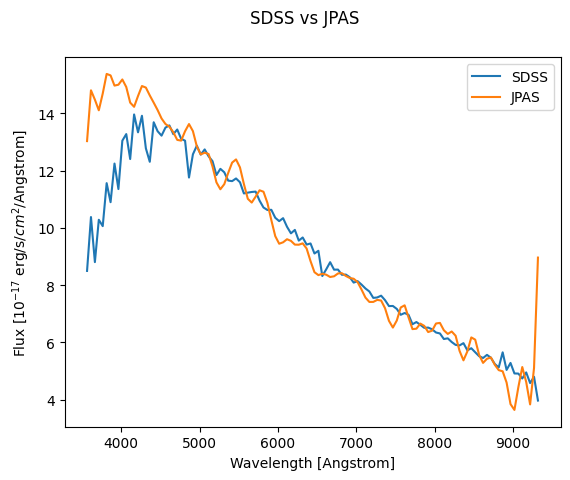

In [83]:
# Resample SDSS
x = 10**data['loglam'].astype(float)
y = data['flux'].astype(float)

f = interpolate.interp1d(x, y)
x = np.arange(x.min(), x.max(), 2)
y = f(x)

x = np.insert(x, 0, min_spectrum)
y = np.insert(y, 0, y[:5].mean())
cond = x < max_spectrum
x = x[cond]
x = np.append(x, max_spectrum)
y = y[cond]
y = np.append(y, y[-5:].mean())

y_resampled_sdss = signal.resample(y, int(num_points)+1)
y_resampled_sdss
x_resampled = np.linspace(min_spectrum, max_spectrum, int(num_points)+1)

x = np.array(df_flux.columns[:-4].astype(float))
y = df_flux.loc[idx, x].values
cond = x > min_spectrum
x = x[cond]
np.insert(x, 0, min_spectrum)
# TODO: Interpolate 0 AND 1 BY LINEAR
y = y[cond]
cond = x < max_spectrum
x = x[cond]
x = np.append(x, max_spectrum)
y = y[cond]
y = np.append(y, y[-1])

y_resampled_jpas = signal.resample(y, int(num_points)+1)
y_resampled_jpas

plt.plot(x_resampled, y_resampled_sdss, label='SDSS')
plt.plot(x_resampled, y_resampled_jpas / 100 - 1, label='JPAS')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel(r'Flux [$10^{-17}$ erg/s/$cm^2$/Angstrom]')
plt.suptitle('SDSS vs JPAS')
plt.legend()
# x_japs_resampled, y_jpas_resampled = signal.resample(y_jpas, num_jpas_samples, t=x_jpas) 
# x_resampled

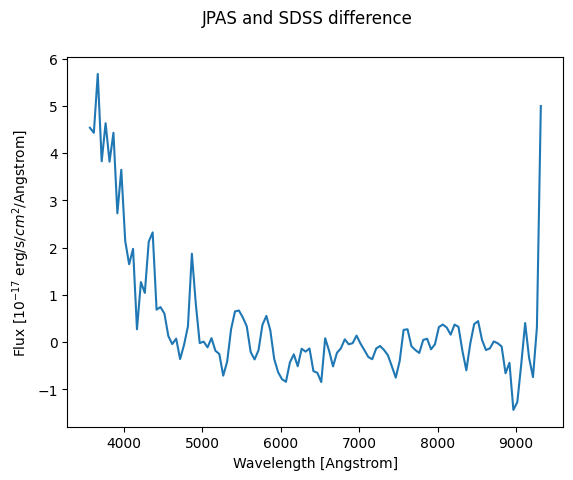

In [84]:
plt.plot(x_resampled, y_resampled_jpas / 100 - 1 - y_resampled_sdss)
plt.suptitle('JPAS and SDSS difference')
plt.xlabel('Wavelength [Angstrom]')
plt.ylabel(r'Flux [$10^{-17}$ erg/s/$cm^2$/Angstrom]')
plt.show()

In [64]:
num_sdss_samples = round((10**data['loglam'].astype(float).max() - 10**data['loglam'].astype(float).min())/50.1756)

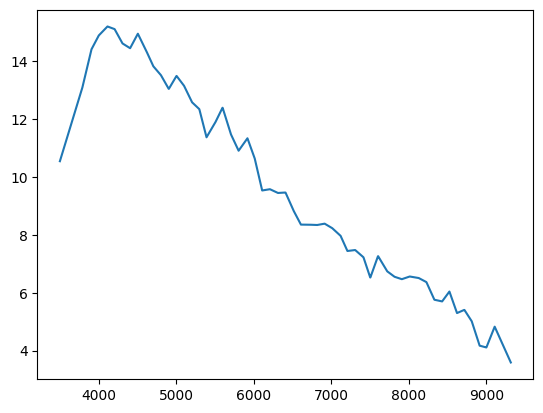

In [65]:
x_jpas = df_flux.columns[:-4].values
y_jpas = df_flux.loc[idx, :].values[:-4]/100 -1
f = interpolate.interp1d(x_jpas, y_jpas)

x_jpasnew = np.arange(x_jpas.min(), x_jpas.max(), 2)

y_jpasnew = f(x_jpasnew)
plt.plot(x_jpasnew, y_jpasnew, '-')
plt.show()
df_jpas_spec_interp = pd.DataFrame({'wavelength': x_jpasnew, 'flux': y_jpasnew})
x_jpas.max()
num_jpas_samples = round((df_jpas_spec_interp['wavelength'].max() -df_jpas_spec_interp['wavelength'].min())/50.1756)

In [66]:
10**data['loglam'].astype(float).min()
df_flux.columns.values.max()

np.int64(9316)

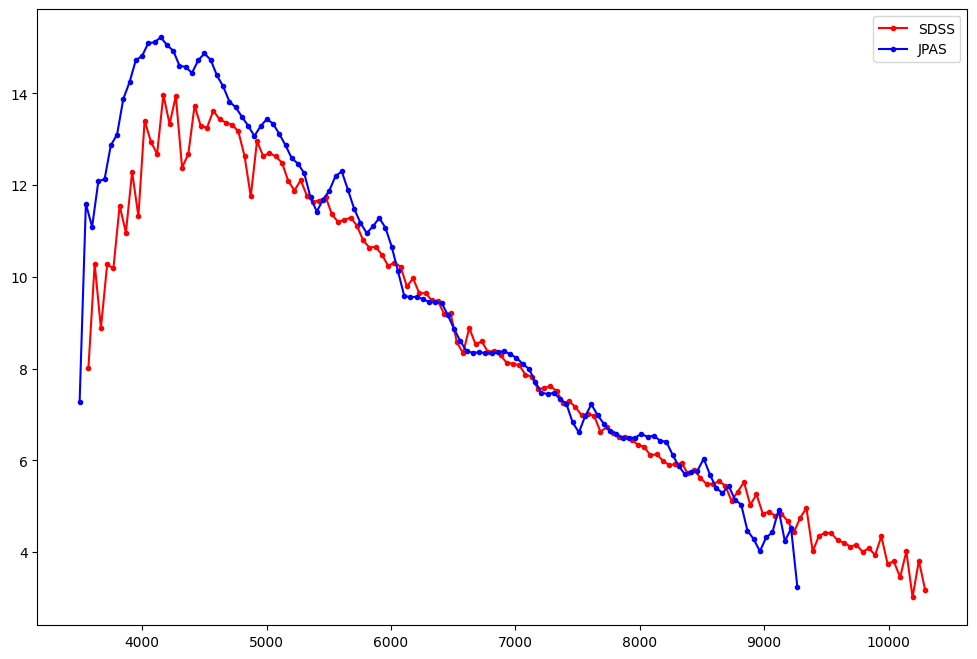

-0.7411283554845038


In [67]:
x = df_sdss_spec_interp['wavelength']
y = df_sdss_spec_interp['flux']

x_jpas = df_jpas_spec_interp['wavelength']
y_jpas = df_jpas_spec_interp['flux']

plt.figure(figsize=(12, 8))
x.min()
x_resampled, y_resampled = signal.resample(y, num_sdss_samples, t=x)
x_japs_resampled, y_jpas_resampled = signal.resample(y_jpas, num_jpas_samples, t=x_jpas) 

plt.plot(y_resampled, x_resampled, marker='.', linestyle='-', color='r', label="SDSS")
plt.plot(y_jpas_resampled, x_japs_resampled, marker='.', linestyle='-', color='b', label="JPAS")
plt.legend()
#xx = df_flux.columns[:-4].values
#yy = df_flux.loc[idx, :].values[:-4] / 100 -1
#for x, y in zip(xx, yy):
#   plt.plot([x, x], [0, y])
plt.show()
# f.shape
print(x_japs_resampled[0] - x_resampled[0])

In [78]:
x_diff = x_japs_resampled - x_resampled
plt.plot(x_diff, y_jpas_resampled)
plt.show()

ValueError: operands could not be broadcast together with shapes (116,) (135,) 

[3488.50044021 3536.79068522 3588.53779268 3637.23073043 3687.62572319
 3736.29618662 3787.13316868 3835.956699   3887.019284   3935.50201454
 3985.44359971 4036.48786514 4085.1030875  4135.89908292 4185.49296974
 4236.80323161 4287.44707698 4336.23732484 4386.72350881 4437.0498722
 4486.94076834 4537.03738005 4587.51523312 4637.52522636 4688.02150138
 4738.26155494 4789.72023209 4839.08197028 4888.95256461 4939.43710494
 4989.4282132  5039.84200278 5090.18321292 5140.84065878 5190.79579677
 5241.08871444 5291.55260562 5341.74214119 5391.82174877 5442.12601917
 5492.69020438 5542.83444385 5592.9833706  5643.14337823 5693.63170877
 5744.04346588 5794.30287895 5844.46910918 5894.91930861 5945.20945154
 5995.27784479 6045.75132277 6096.15341434 6146.20544281 6196.75167866
 6246.81486583 6297.23516819 6347.36887914 6397.89244385 6447.96997932
 6499.02387515 6548.96171296 6598.88471367 6649.31932763 6699.48891495
 6749.84313419 6800.0071068  6850.27281312 6900.63296822 6950.75367541
 7001.0

<Axes: >

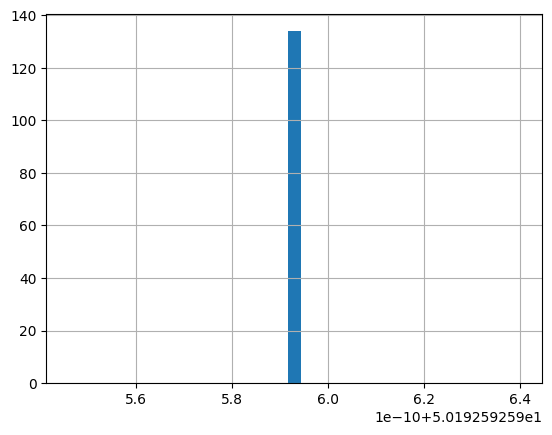

In [69]:
df_sdss_spec_resampled = pd.DataFrame({'wavelength': x_resampled, 'flux': y_resampled})
df_sdss_spec_resampled['flux'].diff().hist(bins=1)

In [143]:
# TODO: Resample the flux to the same wavelength as the SDSS spectra
# TODO: Compare xmatch our with the xmatch from JPAS xmacth_sdss

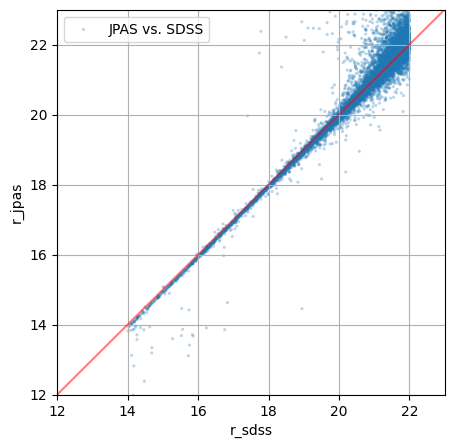

In [144]:
df_filter.loc[rSDSS_ID]
r_mags = pd.DataFrame({'r_jpas': df_flux[df_filter.loc[rSDSS_ID]['wavelength']],
                       'r_sdss': df_merged['r']})

r_mags['r_jpas_mag'] = r_mags['r_jpas'].apply(lambda row : 26-2.5 * np.log10(row))

figure1 = plt.figure(figsize=(5, 5))
plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas_mag'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
plt.xlim(12, 23)
plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()

In [147]:
print(df_merged)

                     objid          ra        dec         u         g  \
0      1237659120396009642  213.268077  52.116471  20.70730  20.38651   
1      1237659120396009783  213.203442  52.128421  24.93485  22.53521   
2      1237659120396140570  213.759266  52.055793  17.76128  16.59172   
3      1237659120396140967  213.686459  52.010739  22.64963  21.84366   
4      1237659120932946121  213.651526  52.329250  20.89500  18.39217   
...                    ...         ...        ...       ...       ...   
11224  1237661417139602408  215.786166  53.159142  21.70130  23.08870   
11225  1237661417139601866  215.646435  53.094276  24.54577  22.84830   
11226  1237661417139601850  215.627142  53.081659  22.64567  22.38203   
11227  1237661417139601410  215.599772  53.166277  18.41347  17.48721   
11228  1237661417139536785  215.466450  53.244510  21.51586  21.15982   

              r         i         z   run  camcol  ...            specObjID  \
0      20.27203  20.22480  20.04869  3177   

In [ ]:
figure1 = plt.figure(figsize=(5, 5))
# plt.plot([12, 23], [12, 23], color="red", alpha=0.5)
plt.scatter(x=r_mags['r_sdss'], y=r_mags['r_jpas_mag']-r_mags['r_sdss'], s=5, 
            edgecolors='none', alpha=0.3, label='JPAS vs. SDSS')
plt.xlabel('r_sdss')
plt.ylabel('r_jpas')
# plt.xlim(12, 23)
# plt.ylim(12, 23)
plt.grid()
plt.legend()
plt.show()